# Sección A
## A.1 Datos abiertos de la CDMX
La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las **carpetas de investigación aportadospor la PGJ**. La tabla está disponible aquí: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-pgj-cdmx.


### \*Load data before proceeding\*:

In [1]:
'''
Load Required libraries
'''
import pandas as pd #For data manipulation and exploration
import numpy as np #Array operations
import matplotlib.pyplot as plt #Ploting
import geopandas #for map ploting

In [2]:
#Load Dataset
df = pd.read_csv('data-pgj.csv')
#Take a look at the first rows
df.head()

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


### 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

* **Check for null values**: How many null values are present in the dataset (by column).
* **Check for non-neccesary columns (if any)**: Drops columns non-neccesary for the present analysis.
* **Generate new columns if required**: extracting specific sections of a datetime and assigned as new columns may allow this analysis to go deeper in detail.
* **Check for data types**: Data type assigned for each column in the dataset.
* **Remove special characters**: Delete accents, and any special common character (%,$,#,",',...)

#### Check for null values.

In [3]:
#Check for null values and data types for data consistency
print('DataFrame Info: ')
print(df.info())
print('\n\n')
#Get proportion of missing values
missing_prop = pd.Series(round((df.isnull().sum() * 100 / len(df)), 2)) 
print('Column name and its respective null values proportion:\n', missing_prop)
      

DataFrame Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-nu

#### *From the information above, we can see most of the missing values are present in columns: 'colonia_hechos', 'calle_hechos2', and georeferential data.* **BUT**, what can we do about them?

* *'calle_hechos2'* is the column with most misisng values (up to **59.45%**), and given its relevance it could be dropped for this analysis.
* For the rest of columns, the average missing proportion (non zero) is just **1.6%**. Thus, dropping columns is not recommended. On the other hand, due to the objective of this analysis, it isn't recommended to replace null values (either with mean, mode, or back/forward filling) since:
    * It's critical data were information should be as accurate as possible.
    * Categorical data cannot be statistically assigned nor interpolated.
    * Georeferential data is sensible to a decimal point precision.

Given this, we can drop rows with relevant (for this exercise) missing columns, such as *'fecha_hechos'*

In [4]:
#Drop 'calle_hechos2' column from dataframe
df.drop(['calle_hechos2'], inplace=True, axis=1)

#Keep only rows whose 'fecha_hechos' rows is not null
df = df[df['fecha_hechos'].notna()]

#### *Check for non-neccesary columns and drop them (if any)**

* The *'id'* columns is irrelevant for this specific analythis. This, we can drop it.
* *'geopoint'* can be just concatenated from *'latitud'* and *'longitud'* whenever is needed.

In [5]:
#Drop columns
to_drop = ['id', 'geopoint']
df.drop(to_drop, inplace=True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808673 entries, 0 to 808870
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ao_hechos             808673 non-null  float64
 1   mes_hechos            808673 non-null  object 
 2   fecha_hechos          808673 non-null  object 
 3   delito                808673 non-null  object 
 4   categoria_delito      808673 non-null  object 
 5   fiscalia              808673 non-null  object 
 6   agencia               808673 non-null  object 
 7   unidad_investigacion  808449 non-null  object 
 8   colonia_hechos        776650 non-null  object 
 9   alcaldia_hechos       807672 non-null  object 
 10  fecha_inicio          808673 non-null  object 
 11  mes_inicio            808673 non-null  object 
 12  ao_inicio             808673 non-null  int64  
 13  calle_hechos          806306 non-null  object 
 14  longitud              777405 non-null  float64
 15  

#### **Generate new columns if required**
As per analysis requeriment, we can obtain date information at yearly, monthly, weekly. biweekly, daily, hourly detal. 

In [7]:
#Set *'fecha_hechos'* and *'fecha_inicio'* as datetime pandas data type
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'], format='%Y%m%d %H:%M')
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], format='%Y%m%d %H:%M')
#Add day
df['dia_hechos'] = df.fecha_hechos.dt.day
df['dia_inicio'] = df.fecha_inicio.dt.day
#add hour
df['hora_hechos'] = df.fecha_hechos.dt.hour
df['hora_inicio'] = df.fecha_inicio.dt.hour
#add week
df['semana_hechos'] = df.fecha_hechos.dt.week
df['semana_inicio'] = df.fecha_inicio.dt.week
#add day of week (monday = 0, sunday = 6)
df['dia_semana_hechos'] = df.fecha_hechos.dt.dayofweek
df['dia_semana_inicio'] = df.fecha_inicio.dt.dayofweek
#replace month by its numeric equivalent
df['mes_hechos'] = df.fecha_hechos.dt.month
df['mes_inicio'] = df.fecha_inicio.dt.month
#replace year by its numeric equivalent
df['ao_hechos'] = df.fecha_hechos.dt.year
df['ao_inicio'] = df.fecha_inicio.dt.year

<ipython-input-7-11ad8f7bc43a>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['semana_hechos'] = df.fecha_hechos.dt.week
<ipython-input-7-11ad8f7bc43a>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['semana_inicio'] = df.fecha_inicio.dt.week


#### **Remove special characters**

Remove the most common special chars, along with accents and set all string columns to lowercase

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808673 entries, 0 to 808870
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ao_hechos             808673 non-null  int64         
 1   mes_hechos            808673 non-null  int64         
 2   fecha_hechos          808673 non-null  datetime64[ns]
 3   delito                808673 non-null  object        
 4   categoria_delito      808673 non-null  object        
 5   fiscalia              808673 non-null  object        
 6   agencia               808673 non-null  object        
 7   unidad_investigacion  808449 non-null  object        
 8   colonia_hechos        776650 non-null  object        
 9   alcaldia_hechos       807672 non-null  object        
 10  fecha_inicio          808673 non-null  datetime64[ns]
 11  mes_inicio            808673 non-null  int64         
 12  ao_inicio             808673 non-null  int64         
 13 

In [9]:
'''
Function to clean unicode chars (accents)
'''
import re
import unicodedata
def clean_column(column):
    try:
        column = unicode(column, 'utf-8')
    except NameError:
        pass
    column = unicodedata.normalize('NFD', column).encode('ascii', 'ignore').decode("utf-8")
    #remove special chars
    re.sub("[!#$%&/|,.]", "", column)
    
    return column

#Set columns to clean (str)
cols = ['delito', 'categoria_delito', 'fiscalia', 'agencia', 'unidad_investigacion', 'colonia_hechos', 'alcaldia_hechos','calle_hechos']

#clean columns
for c in cols:
    print('Cleaning column: ', c)
    #fill null values with empty string to avoid exceptions
    df[[c]] = df[[c]].fillna(value='')
    #cast to lowercase
    df[c] = df[c].apply(lambda x: x.lower())
    #clear unicode chars
    df[c] = df[c].apply(lambda x: clean_column(x))
    print('Done')

Cleaning column:  delito
Done
Cleaning column:  categoria_delito
Done
Cleaning column:  fiscalia
Done
Cleaning column:  agencia
Done
Cleaning column:  unidad_investigacion
Done
Cleaning column:  colonia_hechos
Done
Cleaning column:  alcaldia_hechos
Done
Cleaning column:  calle_hechos
Done


In [10]:
df

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,...,longitud,latitud,dia_hechos,dia_inicio,hora_hechos,hora_inicio,semana_hechos,semana_inicio,dia_semana_hechos,dia_semana_inicio
0,2016,1,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,investigacion en gustavo a. madero,gam-6,ui-1cd,granjas modernas,gustavo a madero,...,-99.103527,19.481076,5,5,17,18,1,1,1,1
1,2017,11,2017-11-01 14:00:00,robo de vehiculo de servicio particular sin vi...,robo de vehiculo con y sin violencia,investigacion en azcapotzalco,az-1,ui-1sd,,tlalnepantla de baz,...,NaN,NaN,1,1,14,16,44,44,2,2
2,2017,11,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en via publica con y sin vio...,investigacion en iztacalco,izc-2,ui-1sd,gabriel ramos millan seccion tlacotal,iztacalco,...,-99.106072,19.395398,1,1,16,16,44,44,2,2
3,2015,12,2015-12-30 20:00:00,fraude,delito de bajo impacto,investigacion en iztapalapa,izp-8,ui-1cd,consejo agrarista mexicano,iztapalapa,...,-99.055887,19.322458,30,5,20,21,53,1,2,1
4,2018,5,2018-05-16 16:00:00,robo a repartidor con violencia,robo a repartidor con y sin violencia,investigacion en iztapalapa,izp-9,ui-2sd,desarrollo urbano quetzalcoatl,iztapalapa,...,-99.042786,19.319141,16,22,16,10,20,21,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,2018,7,2018-07-09 22:30:00,robo a transeunte en via publica con violencia,robo a transeunte en via publica con y sin vio...,investigacion en miguel hidalgo,mh-1,ui-1sd,anahuac,miguel hidalgo,...,-99.182018,19.439418,9,10,22,18,28,28,0,1
808867,2018,7,2018-07-29 05:00:00,violencia familiar,delito de bajo impacto,investigacion en milpa alta,mil-2,ui-1cd,santa cruz xochitepec,xochimilco,...,-99.134738,19.254935,29,29,5,12,30,30,6,6
808868,2019,2,2019-02-14 19:00:00,lesiones intencionales por arma de fuego,lesiones dolosas por disparo de arma de fuego,investigacion en miguel hidalgo,h1,ui-1sd,industrial,gustavo a madero,...,-99.122943,19.473867,14,15,19,12,7,7,3,4
808869,2019,2,2019-02-15 10:00:00,privacion de la libertad personal,delito de bajo impacto,investigacion en azcapotzalco,az-4,ui-1sd,cosmopolita,azcapotzalco,...,-99.163384,19.473593,15,15,10,13,7,7,4,4


### 2. 
#### 1. ¿Cuántos delitos registrados hay en la tabla?
808,673
#### 2. ¿Qué rango de tiempo consideran los datos?
From 1906-06-02 19:00:00  to  2019-06-30 23:00:00

In [11]:
#1. answer = 808,673
print('Delitos registrados en la tabla: ', df.delito.count())
print('Rango de fechas: ', df.fecha_hechos.min(), ' - ', df.fecha_hechos.max())

Delitos registrados en la tabla:  808673
Rango de fechas:  1906-06-02 19:00:00  -  2019-06-30 23:00:00


### * Yearly number of crimes through history shows a significant right skew, representing many sparse and outlier values from the year 2010 and before. 
### * 99.7% of total data is contained from year 2010 to 2019.
For this reason, we can delete data from 2009 and before in order to remove noise from data.

Proportion of data from year 2010 to 2019 vs whole dataset: 
99.7


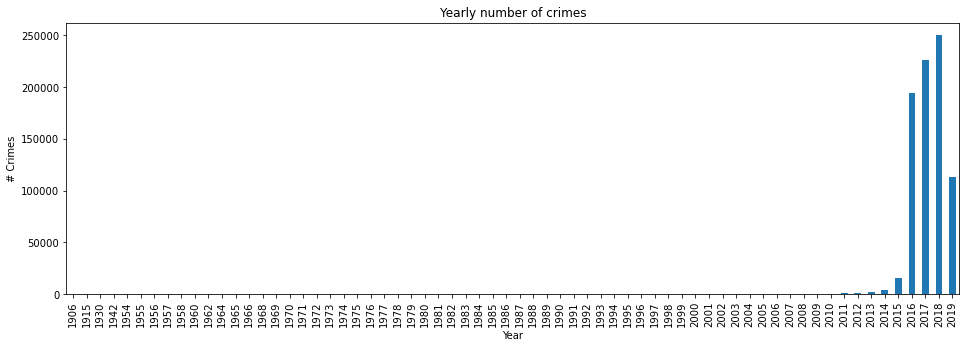

In [12]:
print('Proportion of data from year 2010 to 2019 vs whole dataset: ')
print(round(df.ao_hechos.value_counts().sort_index()[-10:].sum()/len(df), 3) * 100)
_plot = df.ao_hechos.value_counts().sort_index().plot(title = 'Yearly number of crimes', kind='bar', figsize=(16,5))
_plot.set_xlabel('Year')
_plot.set_ylabel('# Crimes')

#Keep values with year greater or equal than 2010
df = df[df['ao_hechos'] >= 2010]

### 3. 
#### 1. ¿Cómo se distribuye el número de delitos en la CDMX?
98.3% out of the 100% CDMX's crimes are focused in only 15 mayoralties
#### 2. ¿Cuáles son los 5 delitos más frecuentes?
violencia familiar              
robo de objetos                 
robo a negocio sin violencia    
fraude                          
denuncia de hechos              


Text(0, 0.5, '# Delitos')

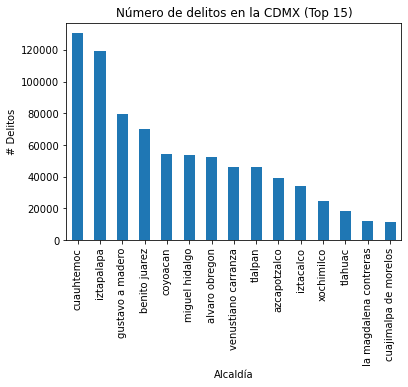

In [13]:
_plot = df.alcaldia_hechos.value_counts()[:15].plot(kind='bar', title = 'Número de delitos en la CDMX (Top 15)')
_plot.set_xlabel('Alcaldía')
_plot.set_ylabel('# Delitos')

#### **98.3% out of the 100% CDMX's crimes are focused in only 15 mayoralties**

In [14]:
print('Proporción de delitos en las 15 alcaldías más conflictivas: ', (df.alcaldia_hechos.value_counts()[:15].sum() / len(df)))
print('Los 5 delitos más frecuentes son: \n')
print(df.delito.value_counts()[:5])

Proporción de delitos en las 15 alcaldías más conflictivas:  0.9829730939424485
Los 5 delitos más frecuentes son: 

violencia familiar              69446
robo de objetos                 52174
robo a negocio sin violencia    51410
fraude                          44887
denuncia de hechos              44074
Name: delito, dtype: int64


#### **The top 5 crimes represent 32.5% of total crimes in CDMX**

In [15]:
df.delito.value_counts()[:5].sum()/len(df)

0.32483041905803384

### 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [16]:
#Set index on date
df.set_index('fecha_hechos', inplace=True)

In [17]:
#filter last year data
ly = df[(df.index >= '2018-07-01') & (df.index <= '2019-06-30')]
#group by month and crime
ly_agg = ly.groupby(['mes_hechos','ao_hechos', 'delito'])['delito'].count()


#### **There are 273 different crimes, thus trying to plot them all is nonsense, we can filter some none representative cases and focus in the rest**.

In [18]:
#Unstack frame on a monthly basis
ly_agg = ly_agg.unstack()
#Get only crimes with at least 6 months with a report value and at least 12 total reports
ly_agg = ly_agg.loc[:, ((ly_agg.isnull().sum(axis=0) <= 6) & (ly_agg.sum(axis=0) > 24))]
#sort items such that we have the last 6 months of 2018 followed by the first 6 months of 2019
ly_agg = ly_agg[6:].append(ly_agg[:6])
#print a few columns to see content
print(ly_agg.iloc[:,:3])

delito                abandono de persona  aborto  abuso de autoridad
mes_hechos ao_hechos                                                 
7          2018                      44.0     9.0               138.0
8          2018                      58.0     9.0               171.0
9          2018                      55.0    13.0               195.0
10         2018                      65.0     7.0               165.0
11         2018                      60.0     8.0               155.0
12         2018                      53.0    15.0               102.0
1          2019                      47.0    11.0               127.0
2          2019                      62.0    14.0               129.0
3          2019                      71.0    13.0               153.0
4          2019                      55.0    13.0               170.0
5          2019                      47.0    13.0               166.0
6          2019                      46.0     8.0               159.0


In [19]:
#Select crimes going up
gup = ly_agg.loc[:, (ly_agg.loc[(7, 2018)] < ly_agg.loc[(6, 2019)])]
#Select crimes going down
gdown = ly_agg.loc[:, (ly_agg.loc[(7, 2018)] > ly_agg.loc[(6, 2019)])]
#Get the proportion (%) of magnitude how much crimes have increased or decreased
#increased
gup = gup.append(pd.Series(gup.apply(lambda x: round((x[(6, 2019)] - x[(7, 2018)])/x[(7, 2018)], 2) * 100).sort_values(ascending=False), name='inc-dec')) 
#decreased
gdown = gdown.append(pd.Series(gdown.apply(lambda x: round((x[(7, 2018)] - x[(6, 2019)])/x[(6, 2019)], 2) * 100).sort_values(ascending=False), name='inc-dec')) 


#### We can now print both graphs with the top increasing and decreasing rate crimes

Text(0, 0.5, 'Decrement %')

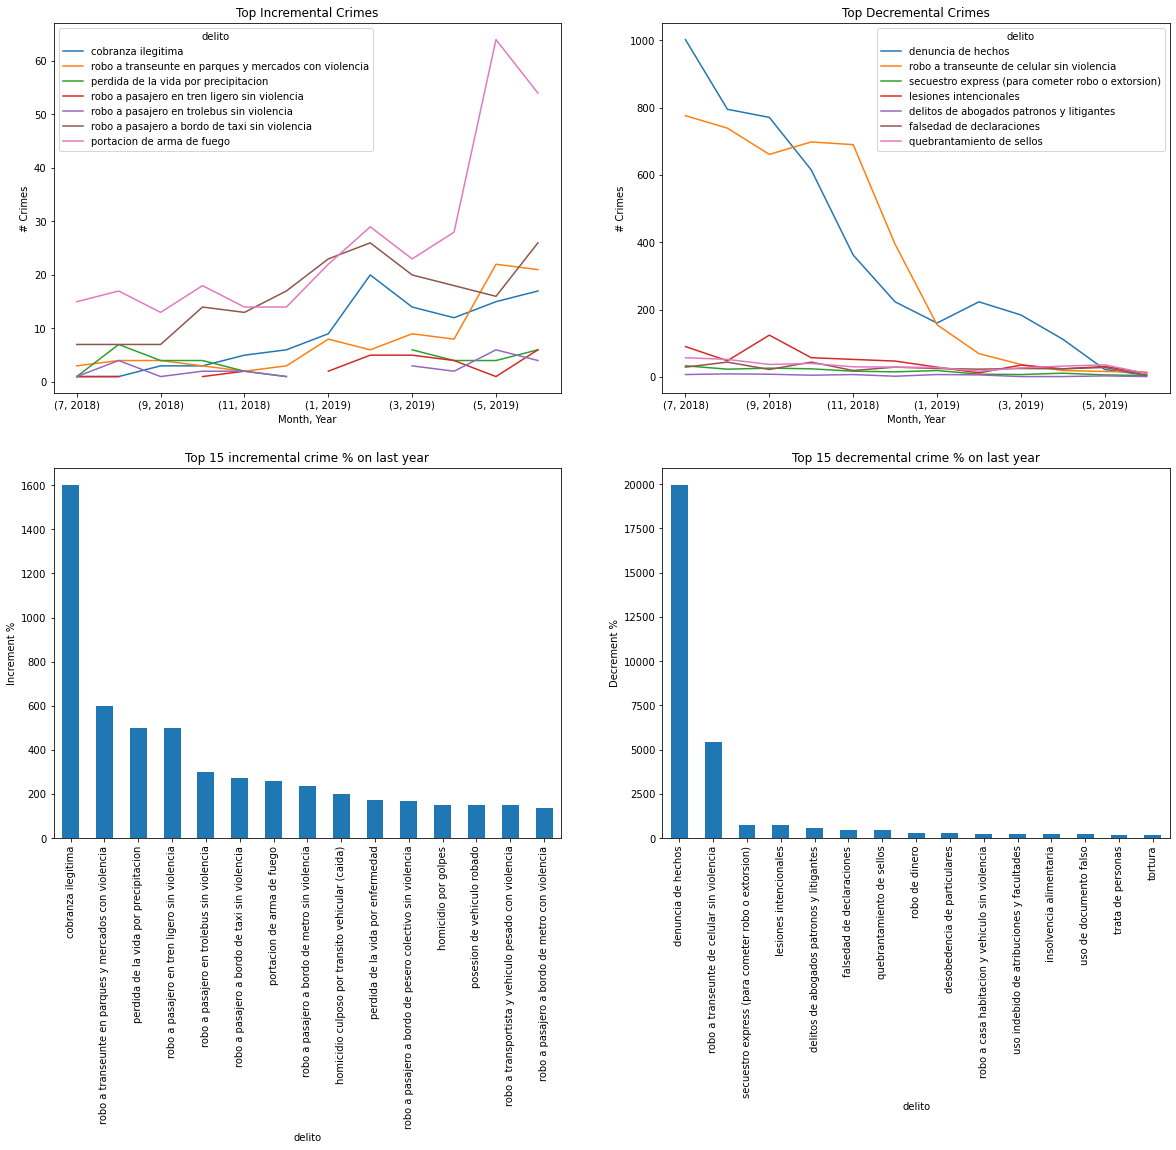

In [20]:
#Set 4 figures to plot on, one aside the other
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(20,15))

#Sort values by increment % 
gup_sorted = gup.T.sort_values(by='inc-dec', ascending = False).T

#Plot k incremental crimes
k = 7
_plot2 = gup_sorted.iloc[:12,:k].plot( title = 'Top Incremental Crimes', ax = ax1)
_plot2.set_xlabel('Month, Year')
_plot2.set_ylabel('# Crimes')

#Sort values by decrement % 
gdown_sorted = gdown.T.sort_values(by='inc-dec', ascending = False).T
#Plot k decremental crimes
_plot2 = gdown_sorted.iloc[:12,:k].plot(title = 'Top Decremental Crimes', ax = ax2)
_plot2.set_xlabel('Month, Year')
_plot2.set_ylabel('# Crimes')

#Sort incremental %
_plot2 = gup_sorted.iloc[12,:15].plot(kind='bar', title= 'Top 15 incremental crime % on last year', ax=ax3)
_plot2.set_ylabel('Increment %')

#Sort decremental %
_plot2 = gdown_sorted.iloc[12,:15].plot(kind='bar', title= 'Top 15 decremental crime % on last year', ax=ax4)
_plot2.set_ylabel('Decrement %')

### 5. 
#### 1. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.
* Cuauhtemoc is the top 1 in crime numbers.
* For the less crimes mayoralty, there´s a tie of 212 rows.

#### 2. ¿Por qué crees que sea esto?
I ignore this answer (not familiarized with mayoralties).

Text(0, 0.5, '# Delitos')

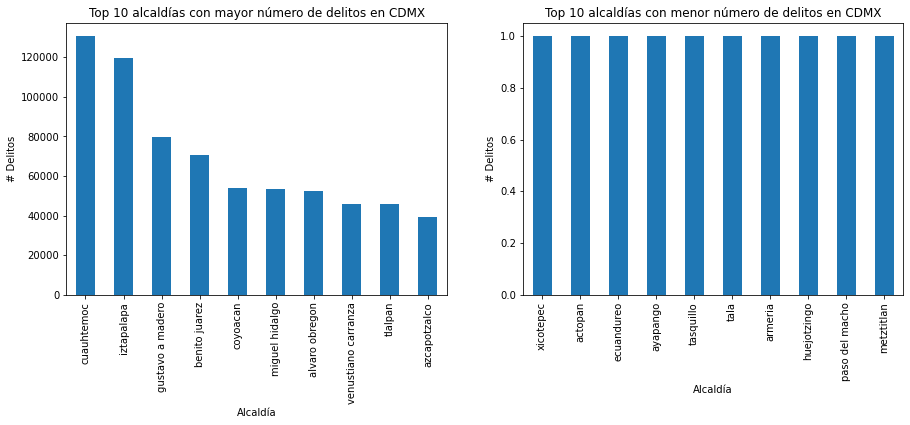

In [21]:
#Plot figures for question 1
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

_plot = df.alcaldia_hechos.value_counts()[:10].plot(ax=ax1, kind='bar', title = 'Top 10 alcaldías con mayor número de delitos en CDMX')
_plot.set_xlabel('Alcaldía')
_plot.set_ylabel('# Delitos')

_plot = df.alcaldia_hechos.value_counts()[-10:].plot(ax=ax2, kind='bar', title = 'Top 10 alcaldías con menor número de delitos en CDMX')
_plot.set_xlabel('Alcaldía')
_plot.set_ylabel('# Delitos')

In [22]:
#Mayoralties with only 1 crime record
print('Mayoralties with only 1 crime record: ', (df.alcaldia_hechos.value_counts() == 1).sum())

Mayoralties with only 1 crime record:  212


### 6. Dentro de cada alcaldía, ¿cuáles son las tres colonias con más delitos?

In [23]:
#Group data by 'alcaldía' and 'colonia' to count occurences.
dat = pd.DataFrame(df[df['colonia_hechos'].apply(lambda x: x not in ['', 'sin informacion'])].groupby(['alcaldia_hechos', 'colonia_hechos'])['delito'].count())
#Print top 3 'colonias' for each 'alcaldía'
for alcaldia, subgroup in dat.groupby(level=0):
    print(pd.DataFrame(subgroup.delito.sort_values(ascending=False)[:3]))
    print('------------------------')

                                       delito
alcaldia_hechos colonia_hechos               
alvaro obregon  jardines del pedregal    2327
                san angel                2015
                zedec santa fe           1840
------------------------
                                        delito
alcaldia_hechos colonia_hechos                
azcapotzalco    el rosario                2817
                industrial vallejo        1928
                centro de azcapotzalco    1793
------------------------
                                  delito
alcaldia_hechos colonia_hechos          
benito juarez   del valle centro   12608
                narvarte            9289
                portales sur        4579
------------------------
                                           delito
alcaldia_hechos colonia_hechos                   
coyoacan        pedregal de santo domingo    4431
                ajusco                       2364
                del carmen                   2344
-----

### 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

(90000.0, 130000.0)

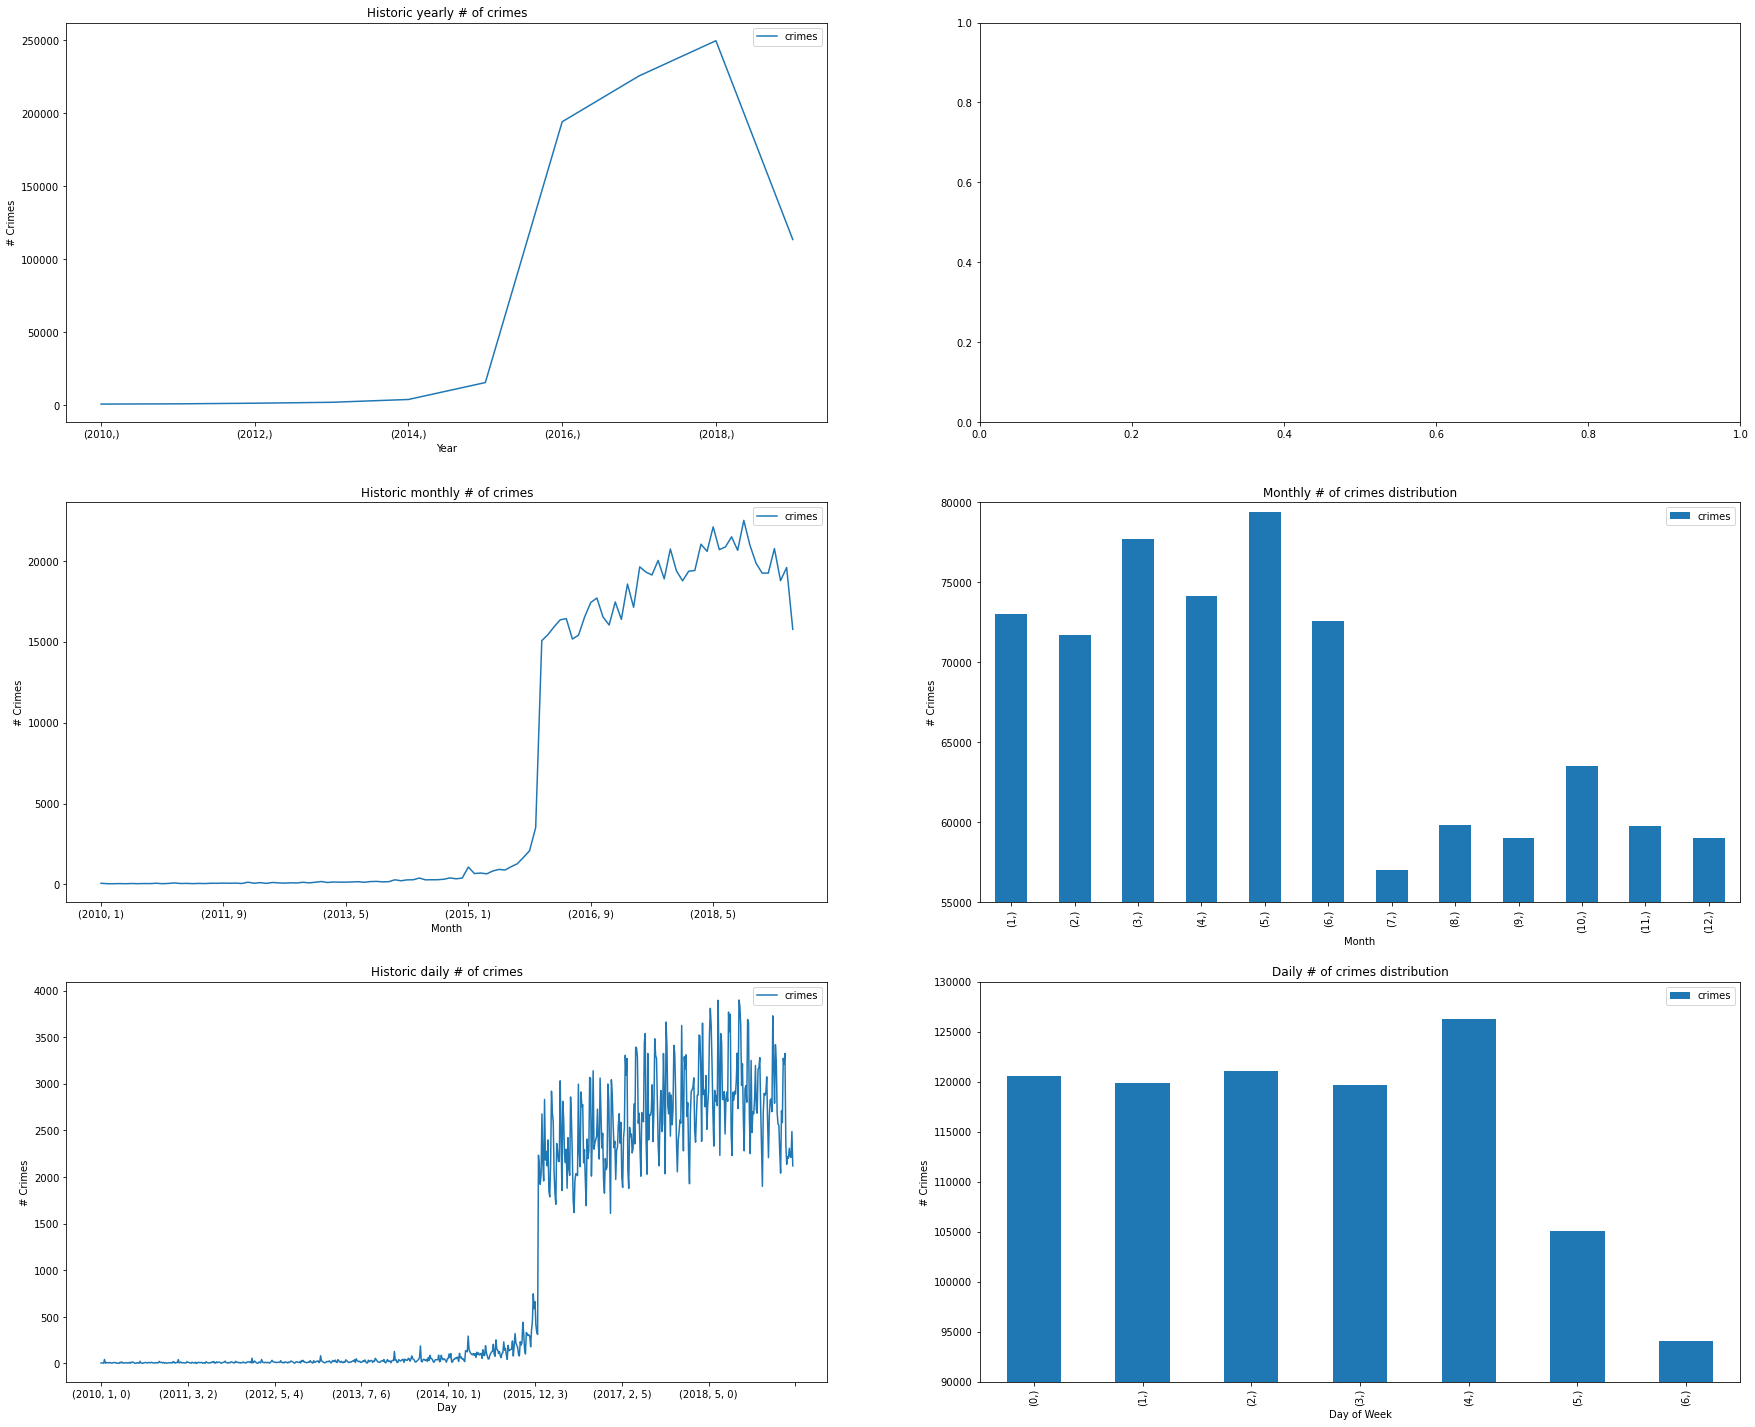

In [24]:
#Set 6 figures to plot on, one aside the other
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3,figsize=(30,25))
#Plot yearly trend.
_plot = pd.DataFrame(df[['ao_hechos']].value_counts(), columns={'crimes'}).sort_index().plot(title= 'Historic yearly # of crimes', kind='line', ax=ax1)
_plot.set_xlabel('Year')
_plot.set_ylabel('# Crimes')

#Plot historical monthly data.
_plot = pd.DataFrame(df[['ao_hechos', 'mes_hechos']].value_counts(), columns={'crimes'}).sort_index().plot(title= 'Historic monthly # of crimes', kind='line', ax=ax3)
_plot.set_xlabel('Month')
_plot.set_ylabel('# Crimes')

#Plot monthly distribution data
_plot = pd.DataFrame(df[['mes_hechos']].value_counts(), columns={'crimes'}).sort_index().plot(title= 'Monthly # of crimes distribution', kind='bar', ax=ax4)
_plot.set_xlabel('Month')
_plot.set_ylabel('# Crimes')
_plot.set_ylim(55000,80000)

#Plot historical daily data.
_plot = pd.DataFrame(df[['ao_hechos', 'mes_hechos', 'dia_semana_hechos']].value_counts(), columns={'crimes'}).sort_index().plot(title= 'Historic daily # of crimes', kind='line', ax=ax5)
_plot.set_xlabel('Day')
_plot.set_ylabel('# Crimes')

#Plot daily distribution data
_plot = pd.DataFrame(df[['dia_semana_hechos']].value_counts(), columns={'crimes'}).sort_index().plot(title= 'Daily # of crimes distribution', kind='bar', ax=ax6)
_plot.set_xlabel('Day of Week')
_plot.set_ylabel('# Crimes')
_plot.set_ylim(90000,130000)

#### From the above we can conclude...
* Yearly trend is going up, we can observe a decreasing point on 2019, however, we have data up to 2019-06, thus there's still half a year needed to conclude trend on last year.
* Monthly and daily historic data on the other hand, shows a clear decrease on crimes on the last year compared with previous values.
* By observing monthly trend, the first 6 months have the most crimes among all months, with **55.6%** of yearly crimes.
* For daily trend, friday represents the day with most of the crimes commited, whilst sunday is the lesser crimes day among the week.

### 8. ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

for top 10

iztapalapa	--> violencia familiar	
cuauhtemoc	--> fraude	
gustavo a madero --> violencia familiar	
benito juarez --> fraude	
tlalpan --> violenciafamiliar	
alvaro obregon --> violencia familiar	
miguel hidalgo --> robo de objetos	
coyoacan --> violencia familiar	
iztacalco --> violencia familiar	
venustiano --> carranza	violencia familiar	

Text(0, 0.5, 'Frequency')

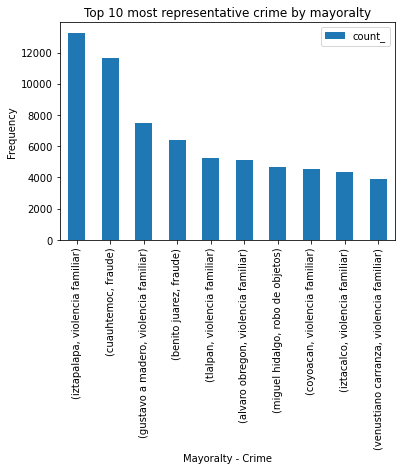

In [25]:
#Get the most representative crime by mayoralty
#Group data by 'alcaldía' and 'delito' to count occurences.
dat = pd.DataFrame(df[df['alcaldia_hechos'].apply(lambda x: x not in ['', 'sin informacion'])].groupby(['alcaldia_hechos', 'delito'])['delito'].count())
#rename output column
dat.columns = {'count_'}

#Create dataframe to add information
new_df = pd.DataFrame({})
#add the top 1 'delito' for each 'alcaldía'
for alcaldia, subgroup in dat.groupby(level=0):
    s = subgroup.count_.sort_values(ascending=False)[:1]
    #append data to dataframe
    new_df = new_df.append({'alcaldia_hechos': s.index[0][0], 
                            'delito': s.index[0][1], 
                            'count_':s[0]}, ignore_index=True)
#Drop index
new_df.reset_index(drop = True, inplace=True)
#Plot results for top 10
_plot = new_df[['alcaldia_hechos','delito', 'count_']].sort_values(by='count_', ascending=False).set_index(['alcaldia_hechos',
                                'delito'])[:10].plot(kind='bar', title = 'Top 10 most representative crime by mayoralty')

_plot.set_xlabel('Mayoralty - Crime')
_plot.set_ylabel('Frequency')


### 9. Calcula el número de homicidios dolosos por cada 100mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

* Data was downloaded from here -> https://www.inegi.org.mx/sistemas/scitel/default?ev=7
* For each mayoralty, population column was extracted.
* All downloaded data has a match with our data to proceed.
* This computation was made with the last year data (From 2018-07-01 to 2019-06-30).



In [26]:
#Load population data from INEGI
data_inegi = pd.read_csv('pob_inegi.csv', encoding = "latin-1")

#Clean 'alcaldia' column
#fill null values with empty string to avoid exceptions
data_inegi[['alcaldia']] = data_inegi[['alcaldia']].fillna(value='')
#cast to lowercase
data_inegi['alcaldia'] = data_inegi['alcaldia'].apply(lambda x: x.lower())
#clear unicode chars
data_inegi['alcaldia'] = data_inegi['alcaldia'].apply(lambda x: clean_column(x))
#Show a few rows
data_inegi.head()

,alcaldia,poblacion
0,cuauhtemoc,531831
1,miguel hidalgo,372889
2,venustiano carranza,430978
3,alvaro obregon,727034
4,azcapotzalco,414711


#### Validate that the mayoralties from INEGI match with our data.

In [27]:
for a in data_inegi['alcaldia']:
    print('Alcaldía: ', a, ' --- match in dataset -> ', df['alcaldia_hechos'].str.contains(a).any())

Alcaldía:  cuauhtemoc  --- match in dataset ->  True
Alcaldía:  miguel hidalgo  --- match in dataset ->  True
Alcaldía:  venustiano carranza  --- match in dataset ->  True
Alcaldía:  alvaro obregon  --- match in dataset ->  True
Alcaldía:  azcapotzalco  --- match in dataset ->  True
Alcaldía:  benito juarez  --- match in dataset ->  True
Alcaldía:  coyoacan  --- match in dataset ->  True
Alcaldía:  cuajimalpa de morelos  --- match in dataset ->  True
Alcaldía:  gustavo a madero  --- match in dataset ->  True
Alcaldía:  iztacalco  --- match in dataset ->  True
Alcaldía:  iztapalapa  --- match in dataset ->  True
Alcaldía:  la magdalena contreras  --- match in dataset ->  True
Alcaldía:  milpa alta  --- match in dataset ->  True
Alcaldía:  tlahuac  --- match in dataset ->  True
Alcaldía:  tlalpan  --- match in dataset ->  True
Alcaldía:  xochimilco  --- match in dataset ->  True


In [28]:
#Extract data from last year containing only mayoralties from the INEGI's data and filter crime for 'homicidios dolosos'
ly_inegi = ly[(ly['alcaldia_hechos'].isin(data_inegi['alcaldia'])) & 
             (ly['delito'].str.contains('homic') == True) & 
              (ly['delito'].str.contains('culposo', 'tentativa') == False)]
#Get the number of crimes by mayoralty
agg_ly_inegi = pd.DataFrame(ly_inegi.groupby('alcaldia_hechos').count()['delito'].reset_index())
#Merge data with population
agg_ly_inegi = agg_ly_inegi.merge(data_inegi, left_on='alcaldia_hechos', right_on = 'alcaldia') 
agg_ly_inegi.drop(columns={'alcaldia'}, inplace=True)
agg_ly_inegi.head(3)

,alcaldia_hechos,delito,poblacion
0,alvaro obregon,112,727034
1,azcapotzalco,58,414711
2,benito juarez,22,385439


In [29]:
#Get the topmost 1 coordinates for each mayoralty
coords = pd.DataFrame(df.groupby('alcaldia_hechos').head(1)[['alcaldia_hechos','longitud', 'latitud']].reset_index(drop=True))
#Cross data with our aggregated inegi data
agg_ly_inegi = agg_ly_inegi.merge(coords)
agg_ly_inegi.head(3)

,alcaldia_hechos,delito,poblacion,longitud,latitud
0,alvaro obregon,112,727034,-99.201435,19.371980
1,azcapotzalco,58,414711,-99.181121,19.471432
2,benito juarez,22,385439,-99.177100,19.379581


In [30]:
#Compute 'número de homicidios dolosos por cada 100mil habitantes'
agg_ly_inegi['rate_100k'] = (agg_ly_inegi['delito'] / agg_ly_inegi['poblacion']) * 100000
agg_ly_inegi.head(3)

,alcaldia_hechos,delito,poblacion,longitud,latitud,rate_100k
0,alvaro obregon,112,727034,-99.201435,19.371980,15.405057
1,azcapotzalco,58,414711,-99.181121,19.471432,13.985643
2,benito juarez,22,385439,-99.177100,19.379581,5.707777


#### a) Pinta un mapa con este indicador. Describe los resultados.

* Venustiano Carranza & Cuauhtemoc lead on intentional homicidies rate on Mexico city with 27 and 25 for every 100k habitants respectively.
* On the other hand, the 'safest' mayoralties on this category are Benito Juares and Coajimalpa with only 5 and 9 intentional homicidies for every 100k habitants respectively.

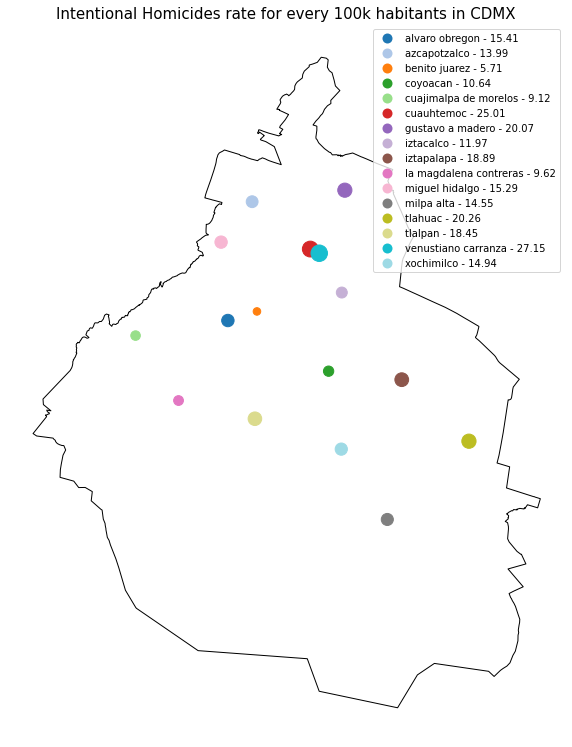

In [31]:
#Create a geodataframe from our previous aggregated data
gdf = geopandas.GeoDataFrame(
    agg_ly_inegi, geometry=geopandas.points_from_xy(agg_ly_inegi.longitud, agg_ly_inegi.latitud))

#Load Mexico's map shape
mex = geopandas.read_file("mexican-states/mexican-states.shp")

#Prepare plot
fig,ax = plt.subplots(1,1,figsize=(10,15))
ax.set_axis_off() #Hide unnecesary axis values
ax.set_title("Intentional Homicides rate for every 100k habitants in CDMX", fontsize=15)

# We restrict to Mexico City and plot the map.
CDMX = mex[mex.name == 'Ciudad de México'].plot(ax=ax,
    color='white', edgecolor='black')

#Set dots size a little bit larger for visualization purposes
_size = gdf['rate_100k'] * 10
#Create a series with mayoralty and rate together to show
_may_rate = gdf['alcaldia_hechos'] + ' - ' + gdf['rate_100k'].apply(lambda x: str(round(x,2)))
# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, column=_may_rate, markersize=_size, categorical=True, legend=True, 
         cmap='tab20')

#Show the map
plt.show()


### 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado  (ej. manzana, calle, AGEB, etc.).

* We could simply use a rate (as the previous point) which based on population assigns a level of insecurity for its citizens.
* However, instead of just consider intentional homicidies, we would consider all of the crimes commited.

**Based on the previous statements, Cuauhtemoc, Benito Juárez and Miguel Hidalgo are the top 3 mayoralties with crime rate based on its commited crimes and population values**

In [32]:
#Extract data from last year containing only mayoralties from the INEGI's data and filter crime for 'homicidios dolosos'
ly_inegi = ly[(ly['alcaldia_hechos'].isin(data_inegi['alcaldia']))]
#Get the number of crimes by mayoralty and crime's category
agg_ly_inegi = pd.DataFrame(ly_inegi.groupby(['alcaldia_hechos']).count()['delito'])
agg_ly_inegi.reset_index(drop=False, inplace=True)
#Merge data with population
agg_ly_inegi = agg_ly_inegi.merge(data_inegi, left_on='alcaldia_hechos', right_on = 'alcaldia') 
agg_ly_inegi.drop(columns={'alcaldia'}, inplace=True)
#Add crime rate for every 100k habitants
agg_ly_inegi['rate_100k'] = (agg_ly_inegi['delito'] / agg_ly_inegi['poblacion']) * 100000
agg_ly_inegi.sort_values(by = 'rate_100k', ascending=False).head(5)

,alcaldia_hechos,delito,poblacion,rate_100k
5,cuauhtemoc,36682,531831,6897.303843
2,benito juarez,20405,385439,5293.963507
10,miguel hidalgo,15743,372889,4221.899815
14,venustiano carranza,14478,430978,3359.336207
7,iztacalco,10738,384326,2793.982192


### 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos(hint:puedes usar algoritmos de Machine Learning no supervisados).

* We could create a dataframe to clusted mayoralties based on its commited crimes.
* As we don´t have all mayoralties population available, we could use 'categoria_delito' instead of 'delito' as mayoralty feature (16 features instead of 274).
* Normalize data with max min (most relevant crime categories gets 1, whilst less relevant gets 0, remaining values are between 0 & 1)
* To achieve this we can simply use K-means.
* Again, we are only considering last year data.
#### a)¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?


* Based on this experiment setup, cluster of mayoralties are grouped by how similar they are **in proportion** of crime categories commited on them. 


In [33]:
#First, lets create our dataframe from the previous defines 'ly' with last year's data and group by 'alcaldia' and 'categoria_delito'
agg_ly = pd.DataFrame(ly[ly.alcaldia_hechos != ''].groupby(['alcaldia_hechos', 'categoria_delito']).count()['delito'])

#Now lets create our sparse dataframe as required to feed the K-means algorithm
agg_ly = pd.DataFrame(agg_ly.unstack()).reset_index(drop=False).fillna(0)

#Fix multiindex column
agg_ly.columns = agg_ly.columns.droplevel()

#Rename our mayoralty column
agg_ly = agg_ly.rename({'': 'alcaldia_hechos'}, axis=1) 

#Normalize data with max min (most relevant crime gets 1, whilst less relevant gets 0, remaining values are between 0 & 1)
nrm_agg_ly = round(agg_ly.iloc[:,1:].subtract(agg_ly.iloc[:,1:].min(axis=1), axis=0)\
  .divide(agg_ly.iloc[:,1:].max(axis=1) - agg_ly.iloc[:,1:].min(axis=1), axis=0)\
  .combine_first(agg_ly.iloc[:,1:]), 2)
nrm_agg_ly.head(3)

categoria_delito,delito de bajo impacto,hecho no delictivo,homicidio doloso,lesiones dolosas por disparo de arma de fuego,robo a casa habitacion con violencia,robo a cuentahabiente saliendo del cajero con violencia,robo a negocio con violencia,robo a pasajero a bordo de microbus con y sin violencia,robo a pasajero a bordo de taxi con violencia,robo a pasajero a bordo del metro con y sin violencia,robo a repartidor con y sin violencia,robo a transeunte en via publica con y sin violencia,robo a transportista con y sin violencia,robo de vehiculo con y sin violencia,secuestro,violacion
0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,1.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.0,0.33


Shape of data: (rows, columns) =  (253, 15)


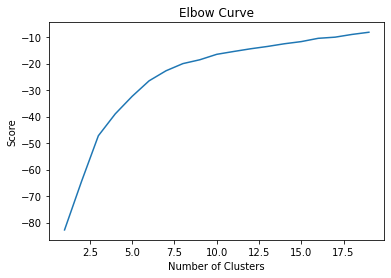

In [34]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#now lets cast our data to numpy arrays (required by k-means)
#Feed our column values 
X = np.array(nrm_agg_ly.iloc[:,1:])
print('Shape of data: (rows, columns) = ', X.shape)

#Finding the optimal value of K
pos = range(1, 20) #possible values
kmeans = [KMeans(n_clusters=i) for i in pos]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(pos,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**As we can see from the previous graph. Our optimal K value can be chosen between 8 and 10**

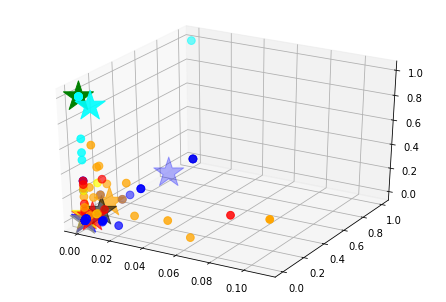

In [35]:
import matplotlib.cm as cm

#Run algorithm on 10 clusters
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

#Observe how data is clustered (by using 3 features)

# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['blue','red','green','blue','cyan','yellow','orange','black','gray','red']
assign=[]
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 6], X[:, 1], X[:, 2], c=assign,s=60)
ax.scatter(C[:, 6], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

In [36]:
#Add labels to our data
lbl_agg_ly = nrm_agg_ly.copy()
lbl_agg_ly['label'] = 0
i = 0
for l in labels:
    lbl_agg_ly.at[i, 'label'] = l
    lbl_agg_ly.at[i, 'alcaldia_hechos'] = agg_ly.loc[i, 'alcaldia_hechos']
    i+=1

Text(0, 0.5, 'Cluster')

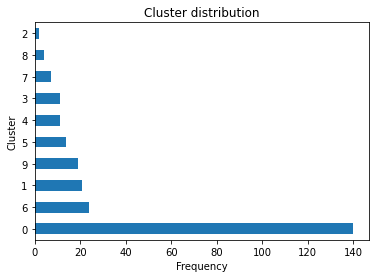

In [37]:
#See our clusters distribution
_plot = lbl_agg_ly['label'].value_counts().plot(kind='barh', title= 'Cluster distribution')
_plot.set_xlabel('Frequency')
_plot.set_ylabel('Cluster')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

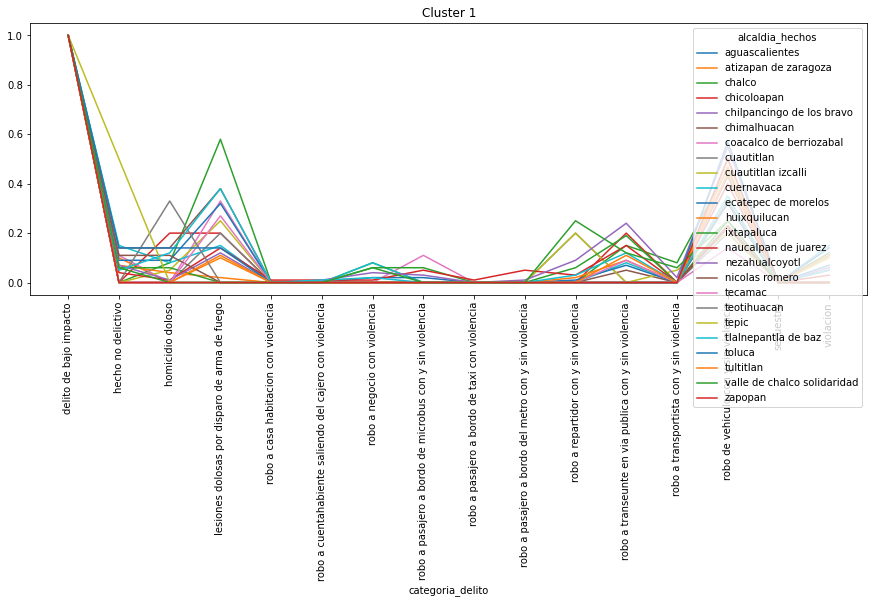

In [40]:
'Plot individual clusters to see similarities among them'
cluster_to_plot = 6
lbl_agg_ly[lbl_agg_ly.label == cluster_to_plot].set_index('alcaldia_hechos').iloc[:,:-1].T.plot(figsize= (15,5),title = 'Cluster 1', kind='line', xticks=[i for i in range(16)])
plt.xticks(rotation=90)


### 12. Toma los delitos clasificados como “Robo a pasajero abordo de transporte público con y sin violencia”.¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

In [39]:
#Filter Data
info_routes = df[(df.categoria_delito == 'robo a pasajero a bordo de microbus con y sin violencia') & (df.colonia_hechos != '')]
#Get top routes
info_routes.colonia_hechos.value_counts().head(10)


agricola pantitlan                    72
unidad ejercito constitucionalista    69
ermita zaragoza                       49
martin carrera                        47
santa martha acatitla                 46
santa cruz meyehualco                 39
infonavit iztacalco                   36
santiago atzacoalco                   36
chinampac de juarez                   33
anahuac                               31
Name: colonia_hechos, dtype: int64